In [2]:
%matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm
import pandas as pd
import seaborn as sns

In [3]:
saratoga_temps=pd.read_csv('datasets/PRISM saratoga mean temp since 1895CSV.csv',delimiter=',')
strawberry_yield79=pd.read_csv('datasets/yield ny strawberries1970-79CSV.csv',delimiter=',')
strawberry_yield89=pd.read_csv('datasets/yield ny strawberries1980-1989CSV.csv',delimiter=',')
strawberry_yield90_12=pd.read_csv('datasets/yield ny strawberries1990-2012CSV.csv',delimiter=',')

saratoga_temps_df = pd.DataFrame(saratoga_temps)
strawberry_yield79_df = pd.DataFrame(strawberry_yield79)
strawberry_yield89_df = pd.DataFrame(strawberry_yield89)
strawberry_yield90_12_df = pd.DataFrame(strawberry_yield90_12)

saratoga_temps_df.columns = saratoga_temps_df.iloc[9]
saratoga_temps_df = saratoga_temps_df[10:]
saratoga_temps_df = saratoga_temps_df.reset_index(drop=True)
saratoga_temps_df = saratoga_temps_df.rename(columns={'tmean (degrees F)':'tmeanF','Date':'Year'})
#saratoga_temps_df.to_csv('datasets/US-Temperatures-CSV2.csv', index=False) 
#saratoga_temps_df.head()
#us_temperatures_df.shape[1]
saratoga_temps_df.head()

9,Year,tmeanF
0,1895,45.1
1,1896,45.1
2,1897,45.2
3,1898,47.1
4,1899,45.7


In [4]:
strawberry_yield79_df.columns = strawberry_yield79_df.iloc[0]
strawberry_yield79_df= strawberry_yield79_df[0:]
strawberry_yield79_df = strawberry_yield79_df.rename(columns={'Item':'State'})

strawberry_yield89_df.columns = strawberry_yield89_df.iloc[0]
strawberry_yield89_df = strawberry_yield89_df[0:]
strawberry_yield89_df = strawberry_yield89_df.rename(columns={'Item':'State'})
#strawberry_yield89_df
#strawberry_yield90_12_df
strawberry_yield90_12_df.columns = strawberry_yield90_12_df.iloc[0]
strawberry_yield90_12_df = strawberry_yield90_12_df[0:]
strawberry_yield90_12_df = strawberry_yield90_12_df.rename(columns={'Item':'State','2012 2/':'2012'})
strawberry_yield90_12_df

,State,1990,1991,1992,1993,1994,1995,1996,1997,1998,...,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012
0,Item,1990,1991,1992,1993,1994,1995,1996,1997,1998,...,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012 2/
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Harvested acreage:,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Arkansas,230,230,230,230,180,180,170,210,180,...,--,--,--,--,--,--,--,--,--,--
4,California,"21,000","21,100","24,000","25,100","23,300","23,600","25,200","22,600","24,200",...,"29,600","33,200","34,300","35,800","35,500","37,600","39,800","38,600","38,000","38,500"
5,Florida,"5,300","5,500","5,400","5,800","5,800","6,000","6,000","6,100","6,200",...,"7,100","7,100","7,300","7,300","6,600","6,900","8,800","8,800","9,900","8,700"
6,Louisiana,750,850,"1,000","1,100","1,100",950,750,450,400,...,--,--,--,--,--,--,--,--,--,--
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,Michigan,"2,200","2,100","2,000","1,900","1,800","1,700","1,500","1,500","1,400",...,"1,100",900,"1,000",850,850,800,800,750,700,650
9,New Jersey,500,500,500,500,450,450,450,450,450,...,--,--,--,--,--,--,--,--,--,--


In [5]:
x = list(strawberry_yield79_df.columns.values)
y = list(strawberry_yield89_df.columns.values)
z = list(strawberry_yield90_12_df.columns.values)

#colnames.pop(0)
mergedlist = x + y + z

mergedlist.remove("State")
mergedlist.remove("State")
mergedlist.remove("State")

mergedlist

['1970',
 '1971',
 '1972',
 '1973',
 '1974',
 '1975',
 '1976',
 '1977',
 '1978',
 '1979',
 '1980',
 '1981',
 '1982',
 '1983',
 '1984',
 '1985',
 '1986',
 '1987',
 '1988',
 '1989',
 '1990',
 '1991',
 '1992',
 '1993',
 '1994',
 '1995',
 '1996',
 '1997',
 '1998',
 '1999',
 '2000',
 '2001',
 '2002',
 '2003',
 '2004',
 '2005',
 '2006',
 '2007',
 '2008',
 '2009',
 '2010',
 '2011',
 '2012']

In [5]:
colnames = pd.Series(mergedlist)
df_ny_strawberry = pd.DataFrame(columns=['Year','Yield','C','D','E','F','G'])
df_ny_strawberry['Year'] = colnames.values
#df_ny_strawberry['Yield'] = colnames.values
df_ny_strawberry

,Year,Yield,C,D,E,F,G
0,1970,NaN,NaN,NaN,NaN,NaN,NaN
1,1971,NaN,NaN,NaN,NaN,NaN,NaN
2,1972,NaN,NaN,NaN,NaN,NaN,NaN
3,1973,NaN,NaN,NaN,NaN,NaN,NaN
4,1974,NaN,NaN,NaN,NaN,NaN,NaN
5,1975,NaN,NaN,NaN,NaN,NaN,NaN
6,1976,NaN,NaN,NaN,NaN,NaN,NaN
7,1977,NaN,NaN,NaN,NaN,NaN,NaN
8,1978,NaN,NaN,NaN,NaN,NaN,NaN
9,1979,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
#newdf= pd.merge(df_ny_strawberry, saratoga_temps_df, on='Year', how='inner')

In [7]:
#sw_ny_df = strawberry_yield79_df[strawberry_yield79_df.State == 'New York Yield']
#sw_ny_df
#strawberry_yield79_df.index
#strawberry_yield79_df["State"].dtype
#strawberry_yield79_df["State"] = strawberry_yield79_df.State.astype(string)


In [8]:
#strawberry_yield79_df[strawberry_yield79_df.State == "New York"]
#strawberry_yield79_df[strawberry_yield79_df[:,0]]
#grouped = strawberry_yield79_df.groupby("New York")
#grouped = strawberry_yield79_df.groupby(['State'])
#grouped
#' New York Yield'
sdf = strawberry_yield79_df.set_index('State').T
sdf = sdf.rename(columns={'    New York Yield':'New_York_Yield'})
#sdf2 = sdf['    New York Yield']
#sdf2
#sdf
yield_79 = []
yield_79= list(sdf["New_York_Yield"])
yield_79

['3.9', '3.5', '2.4', '4', '4.2', '4.1', '3.3', '4.3', '4.9', '5.5']

In [9]:
sdf_89 = strawberry_yield89_df.set_index('State').T
sdf_89 = sdf_89.rename(columns={'    New York Yield':'New_York_Yield'})
#sdf2 = sdf['    New York Yield']
#sdf2
#sdf
yield_89 = []
yield_89 = list(sdf_89["New_York_Yield"])
yield_89

['5.3', '4.6', '4.5', '4.5', '5.1', '5.1', '5.5', '5.7', '4.8', '5.6']

In [10]:
sdf_12 = strawberry_yield90_12_df.set_index('State').T
sdf_12 = sdf_12.rename(columns={'    New York Yield':'New_York_Yield'})
#sdf2 = sdf['    New York Yield']
#sdf2
#sdf
yield_12 = []
yield_12 = list(sdf_12["New_York_Yield"])
yield_12

['6.3',
 '5.6',
 '3',
 '6',
 '4',
 '3.5',
 '3.9',
 '4.2',
 '3.8',
 '4.9',
 '4.1',
 '3.8',
 '4.5',
 '3.3',
 '4.3',
 '3.5',
 '2.9',
 '3.3',
 '3.2',
 '3.1',
 '2.5',
 '2.6',
 '2.3']

In [11]:
yield_79_12 = yield_79 + yield_89 + yield_12

In [12]:
colnames = pd.Series(mergedlist)
df_ny_strawberry = pd.DataFrame(columns=['Year','Yield'])
df_ny_strawberry['Year'] = colnames.values
df_ny_strawberry['Yield'] = yield_79_12
df_ny_strawberry

,Year,Yield
0,1970,3.9
1,1971,3.5
2,1972,2.4
3,1973,4
4,1974,4.2
5,1975,4.1
6,1976,3.3
7,1977,4.3
8,1978,4.9
9,1979,5.5


In [13]:
newdf= pd.merge(df_ny_strawberry, saratoga_temps_df, on='Year', how='inner')
newdf

,Year,Yield,tmeanF
0,1970,3.9,44.5
1,1971,3.5,44.9
2,1972,2.4,43.7
3,1973,4,46.4
4,1974,4.2,44.1
5,1975,4.1,45.1
6,1976,3.3,44
7,1977,4.3,45.6
8,1978,4.9,43.9
9,1979,5.5,45.7


<IPython.core.display.Javascript object>


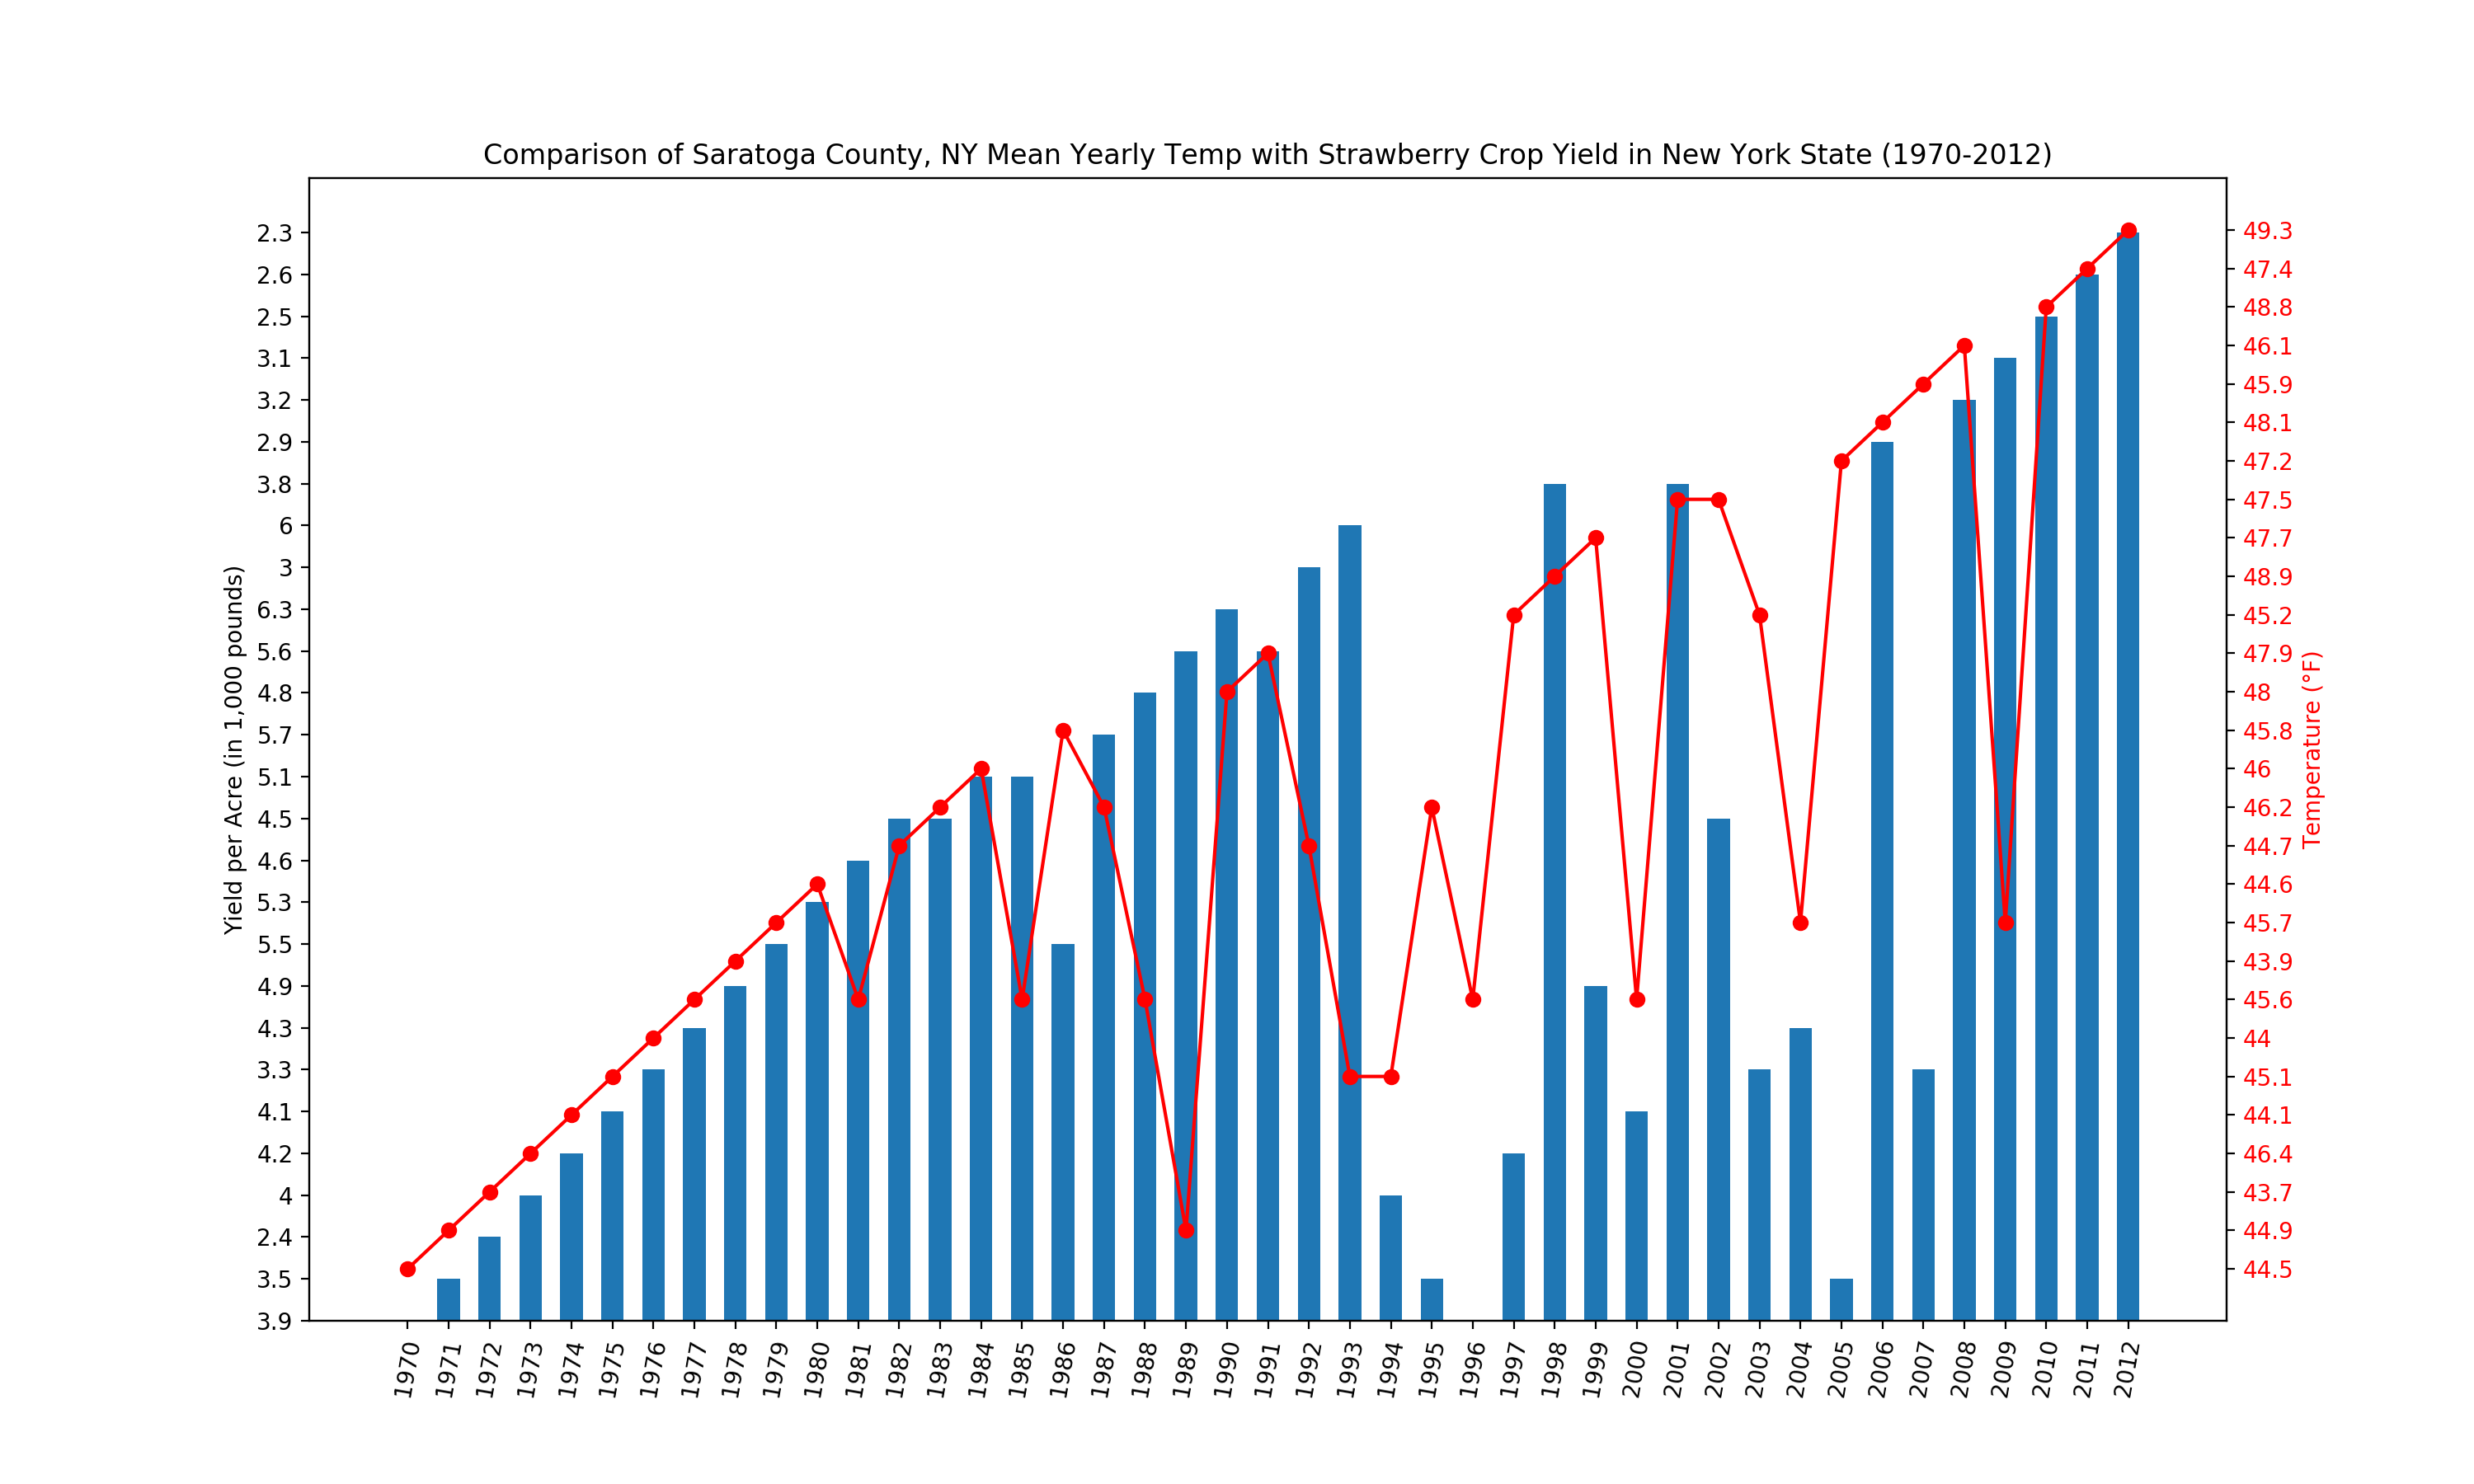

In [36]:
x2=newdf['Year']
y1=newdf['Yield']
y2=newdf['tmeanF']

width = .55

fig = plt.figure(figsize=(15,9))
ax1 = fig.add_subplot(111)
ax1.bar(x2, y1,width = width)
ax1.set_ylabel('Yield per Acre (in 1,000 pounds)')

ax2 = ax1.twinx()
ax2.plot(x2, y2, 'r',marker='o')
ax2.set_ylabel('Temperature (°F)', color='r')
for tl in ax2.get_yticklabels():
    tl.set_color('r')
#http://kitchingroup.cheme.cmu.edu/blog/2013/09/13/Plotting-two-datasets-with-very-different-scales/
ax1.tick_params(axis='x', rotation=80)
plt.xlabel('Year')
plt.title('Comparison of Saratoga County, NY Mean Yearly Temp with Strawberry Crop Yield in New York State (1970-2012)')
plt.savefig('Comparison_Temp_StrwYield_Saratoga.png')

